In [1]:
pip install numpy pandas matplotlib scikit-learn yfinance


  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tfx 1.12.0 requires packaging<21,>=20, but you have packaging 23.0 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
apache-beam 2.45.0 requires numpy<1.23.0,>=1.14.3, but you have numpy 1.24.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf


In [3]:
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
tesla_data = tesla_data['Close']


[*********************100%***********************]  1 of 1 completed


In [4]:
tesla_data = tesla_data.reset_index()
X = np.array(tesla_data.index).reshape(-1, 1)
y = tesla_data['Close']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4952.535032695375


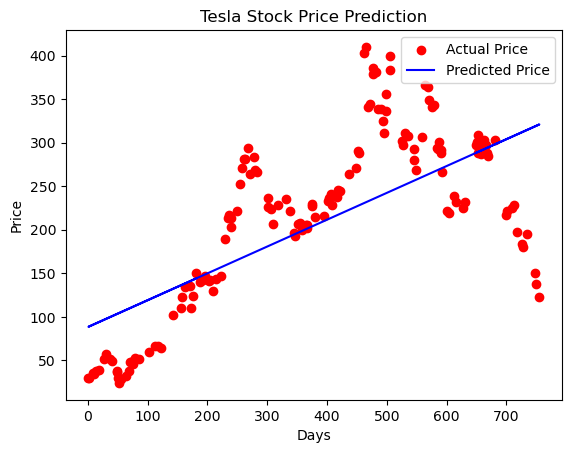

In [8]:
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, predictions, color='blue', label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


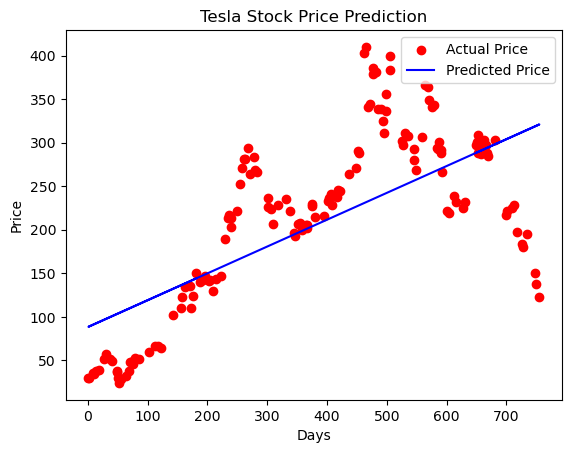

In [9]:
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, predictions, color='blue', label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [10]:
pip install tensorflow


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 1.12.0 requires packaging<21,>=20, but you have packaging 23.0 which is incompatible.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
ml-pipelines-sdk 1.12.0 requires packaging<21,>=20, but you have packaging 23.0 which is incompatible.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 23.0 which is incompatible.
google-cloud-aiplatform 1.17.1 requires packaging<22.0.0dev,>=14.3, but you have packaging 23.0 which is incompatible.
apache-beam 2.45.0 requires numpy<1.23.0,>=1.14.3, but you have numpy 1.24.4 which is incompatible.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf


In [12]:
# Fetch data
tesla_data = yf.download('TSLA', start='2015-01-01', end='2023-01-01')
data = tesla_data.filter(['Close'])

# Convert data to numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create a training dataset
train_data_len = int(np.ceil(len(dataset) * .8))
train_data = scaled_data[0:train_data_len, :]


[*********************100%***********************]  1 of 1 completed


In [13]:
# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [14]:
# Build the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1552/1552 [==============================] - 31s 18ms/step - loss: 9.4925e-04


In [16]:
# Create the testing data set
test_data = scaled_data[train_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [17]:
# Get the model's predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error: {rmse}')


13/13 [==============================] - 1s 16ms/step
Root Mean Squared Error: 18.006825138737454


C:\Users\saharsh\AppData\Local\Temp\ipykernel_25760\3715763772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


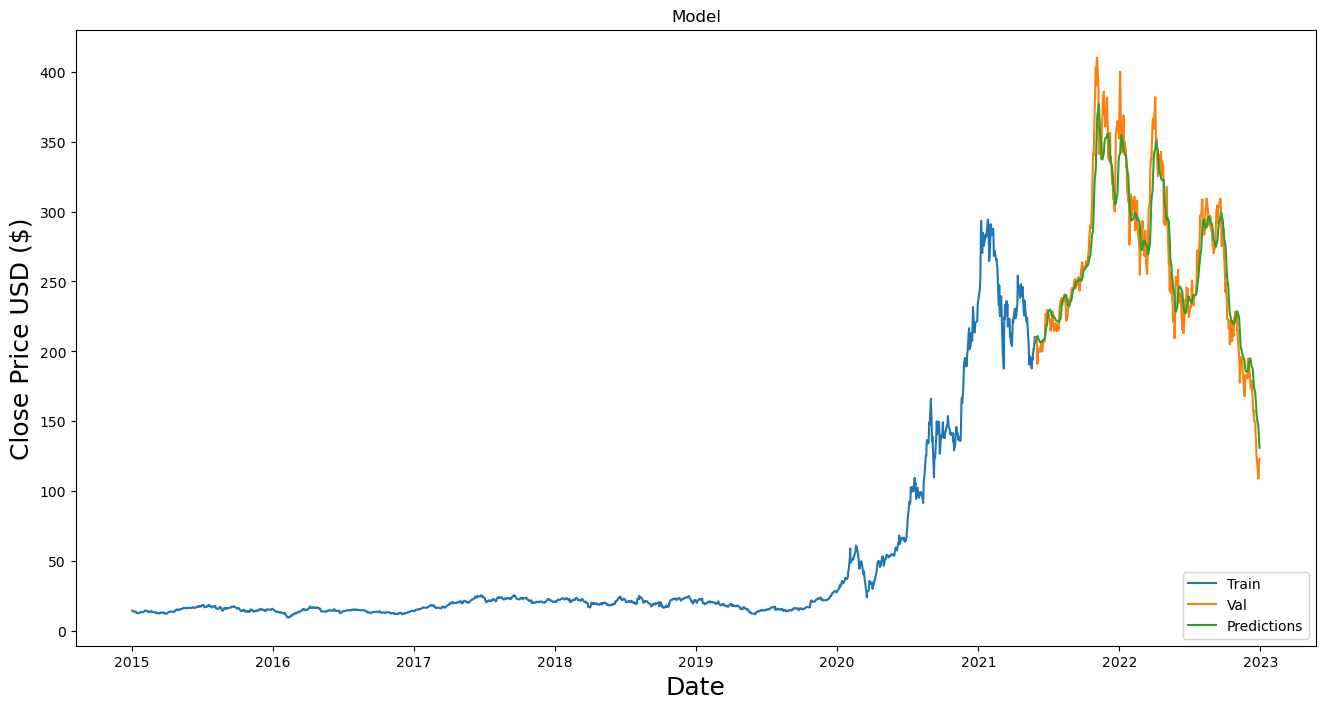

In [18]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


## COMPLETED BY KOLLURU SAHARSH 